# SOURCE CODE

## Title : Motion Capture - Leg Limp

### Name : Ukhem Fahmi Thoriqul Haq

#### Import Library

In [1]:
import cv2
import mediapipe as mp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### MediaPipe Pose Landmark Model

Model landmark di MediaPipe Pose yang memprediksi lokasi dari 33 pose landmark (lihat gambar di bawah ini).

<img src="https://mediapipe.dev/images/mobile/pose_tracking_full_body_landmarks.png" width="600" align="center"/>

#### Make Pose Detection

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

joint_list = [[25, 27, 31], [26, 28, 32]]  # ubah sesuai dengan sendi yang dibutuhkan [[11, 13, 15], [12, 14, 16]]
data = [] # membuat variabel data list kosong
cap = cv2.VideoCapture("videos/pincang-pas.mp4")  # ubah sesuai dengan nama file video "videos/normal.mp4"

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            break

        image.flags.writeable = False
        results = pose.process(image)
        image.flags.writeable = True

        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style()
        )

        angle_list = []  # membuat variabel angle_list list kosong

        for joint in joint_list:
            a = np.array([results.pose_landmarks.landmark[joint[0]].x, results.pose_landmarks.landmark[joint[0]].y])
            b = np.array([results.pose_landmarks.landmark[joint[1]].x, results.pose_landmarks.landmark[joint[1]].y])
            c = np.array([results.pose_landmarks.landmark[joint[2]].x, results.pose_landmarks.landmark[joint[2]].y])

            radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
            angle = np.abs(radians * 180.0 / np.pi)

            if angle > 180.0:
                angle = 360 - angle

            angle_list.append(angle)
            cv2.putText(image, str(round(angle, 2)),
                        tuple(np.multiply(b, [image.shape[1], image.shape[0]]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

        data.append(angle_list)
        cv2.imshow('MediaPipe Pose Kaki Pincang', image)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cv2.destroyAllWindows()
cv2.waitKey(1)
# save dan ubah nama file csv pada tiap videonya
np.savetxt("Sudut Mata Kaki Pincang.csv", data, delimiter=", ", fmt="% s")


|Raw Video Screenshot|Mediapipe Pose Video Screenshot|
|:-:|:-:|
|<img src="https://raw.githubusercontent.com/UFTHaq/Images/main/before.jpg" width="300" />|<img src="https://raw.githubusercontent.com/UFTHaq/Images/main/after.jpg" width="300" /> |

#### Membuat DataFrame Kaki Normal, dengan Memberikan Nama Kolom

In [3]:
df_normal = pd.read_csv("Sudut Mata Kaki Normal.csv", names=['Kiri', 'Kanan'], header=None)
print(df_normal)

          Kiri       Kanan
0    90.237941   74.664759
1    86.553850   87.670728
2    85.578603   86.487193
3    91.313601   80.764238
4    96.649977   80.005609
..         ...         ...
296  82.393757  111.674508
297  76.637795  107.842246
298  73.355923  101.678114
299  70.660995   99.662897
300  69.991326   99.497258

[301 rows x 2 columns]


#### Membuat DataFrame Kaki Pincang, dengan Memberikan Nama Kolom

In [4]:
df_pincang = pd.read_csv("Sudut Mata Kaki Pincang.csv", names=['Kiri', 'Kanan'], header=None)
print(df_pincang)

          Kiri       Kanan
0    90.059347   83.862785
1    90.670682   81.834494
2    90.169595   93.047522
3    88.302325  101.862765
4    83.887808  105.515723
..         ...         ...
301  87.947852   71.783357
302  91.606238   67.473649
303  89.346200   60.606512
304  88.870400   74.537539
305  83.731560   94.076840

[306 rows x 2 columns]


#### Plot Kaki Normal

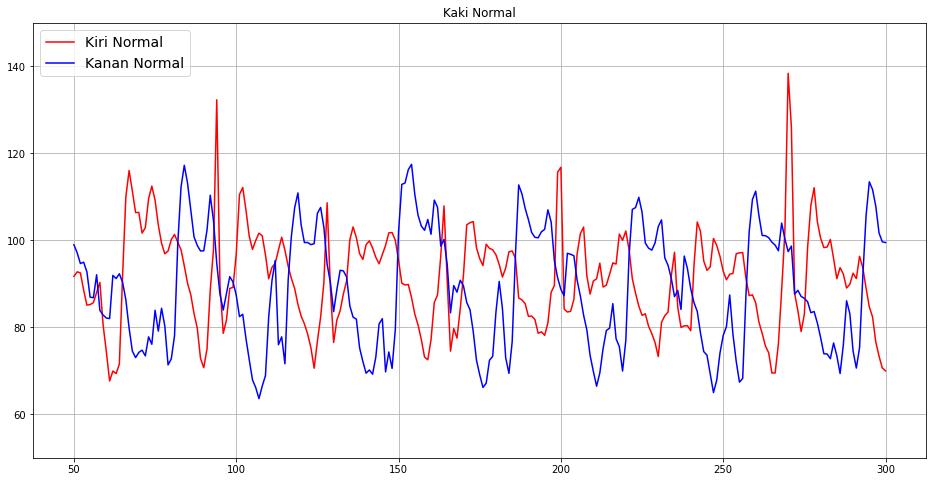

In [5]:
plt.rcParams["figure.figsize"] = (16,8)
plt.plot(df_normal["Kiri"][50:301], "-r", label="Kiri")
plt.plot(df_normal["Kanan"][50:301], "-b", label="Kanan")
plt.title("Kaki Normal")
plt.legend(["Kiri Normal", "Kanan Normal"], fontsize=14)
matplotlib.pyplot.grid(visible=True)
plt.ylim(bottom=50, top=150)
plt.savefig("Chart-Normal.png")

#### Plot Kaki Pincang

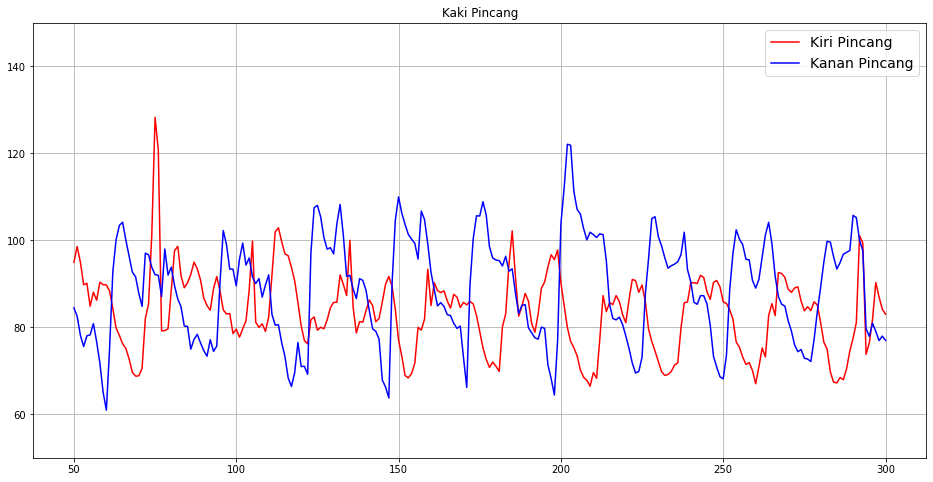

In [6]:
plt.rcParams["figure.figsize"] = (16,8)
plt.plot(df_pincang["Kiri"][50:301], "-r", label="Kiri")
plt.plot(df_pincang["Kanan"][50:301], "-b", label="Kanan")
plt.title("Kaki Pincang")
plt.legend(["Kiri Pincang", "Kanan Pincang"], fontsize=14)
matplotlib.pyplot.grid(visible=True)
plt.ylim(bottom=50, top=150)
plt.savefig("Chart-Pincang.png")

#### Plot Kaki Kanan Normal Vs Kaki Kanan Pincang

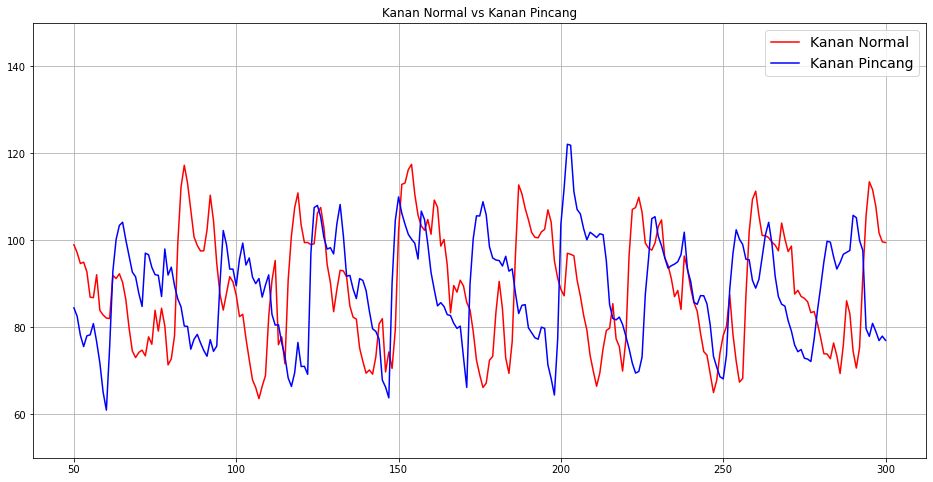

In [7]:
plt.rcParams["figure.figsize"] = (16,8)
plt.plot(df_normal["Kanan"][50:301], "-r", label="Kanan-normal")
plt.plot(df_pincang["Kanan"][50:301], "-b", label="Kanan-pincang")
plt.title("Kanan Normal vs Kanan Pincang")
plt.legend(["Kanan Normal", "Kanan Pincang"], fontsize=14)
matplotlib.pyplot.grid(visible=True)
plt.ylim(bottom=50, top=150)
plt.savefig("Chart-Kanan-Normal-Pincang.png")

<div style='text-align: justify;'>
    Kaki Kanan Normal (merah) dan Kaki Kanan Pincang (biru) Memiliki data yang hampir sama, ini berarti bahwa Kaki Kanan sebernanya tidak ada yang pincang
    </div>

#### Plot Kaki Kiri Normal Vs Kaki Kiri Pincang

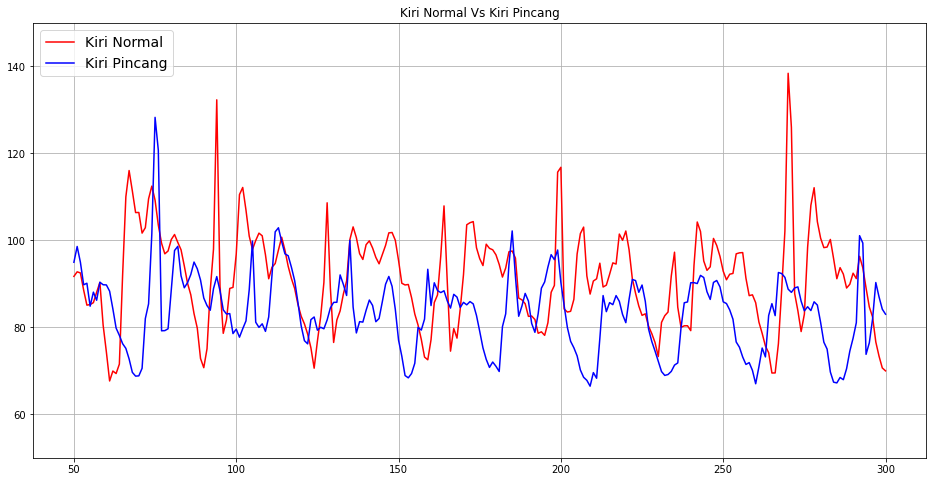

In [8]:
plt.rcParams["figure.figsize"] = (16,8)
plt.plot(df_normal["Kiri"][50:301], "-r", label="Kiri-normal")
plt.plot(df_pincang["Kiri"][50:301], "-b", label="Kiri-pincang")
plt.title("Kiri Normal Vs Kiri Pincang")
plt.legend(["Kiri Normal", "Kiri Pincang"], fontsize=14)
matplotlib.pyplot.grid(visible=True)
plt.ylim(bottom=50, top=150)
plt.savefig("Chart-Kiri-Normal-Pincang.png")

<div style='text-align: justify;'>
    Pada bagian gambar ini telah digabungkan data kaki kiri normal dan kaki kiri pincang. Di gambar ini terlihat bahwa sudut bukaan dari kaki kiri normal lebih besar dari pada sudut bukaan kaki kiri pincang.
    </div>

<div style='text-align: justify;'>
    Dari bukaan sudut terlihat bahwa kaki yang sehat (merah) dapat menggerakkan sudut mata kaki dengan lebih leluasa (sudut besar maupun kecil) jika dibandingkan dengan kaki yang pincang (biru), yang terus berusaha mengunci sudut mata kaki agar rasa sakit pada bagian tersebut tidak terasa sakit saat berjalan dan mencegah rasa sakit menjadi semakin parah.
    </div>

<div style='text-align: justify;'>
    </div>